In [3]:
pip install tensorflow

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1002)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install bs4

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1002)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install wordcloud

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1002)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install nltk


Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1002)'))) - skipping


In [5]:
pip install keras

In [7]:
import requests
from bs4 import BeautifulSoup
import csv
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 2] No such file
[nltk_data]     or directory>
[nltk_data] Error loading stopwords: <urlopen error [Errno 2] No such
[nltk_data]     file or directory>


False

In [8]:
def google_search(query):
    # Construct the Google search URL
    search_url = f"https://www.google.com/search?q={query.replace(' ', '+')}"

    # Set headers to mimic a real browser request
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36"
    }

    # Send an HTTP GET request to Google
    response = requests.get(search_url, headers=headers)

    # Check if the request was successful: 
    if response.status_code == 200:
        
        # Parse the HTML content of the page using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract and print the search results
        search_results = soup.find_all("div", class_="tF2Cxc")
        for result in search_results:
            title = result.h3.text
            link = result.a['href']
            print(f"Title: {title}\nLink: {link}\n")
    else:
        print("Failed to retrieve Google search results.")

# web scrapping the results from searching the word python from google:
query = "Python"
google_search(query)

SSLError: HTTPSConnectionPool(host='www.google.com', port=443): Max retries exceeded with url: /search?q=Python (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1002)')))

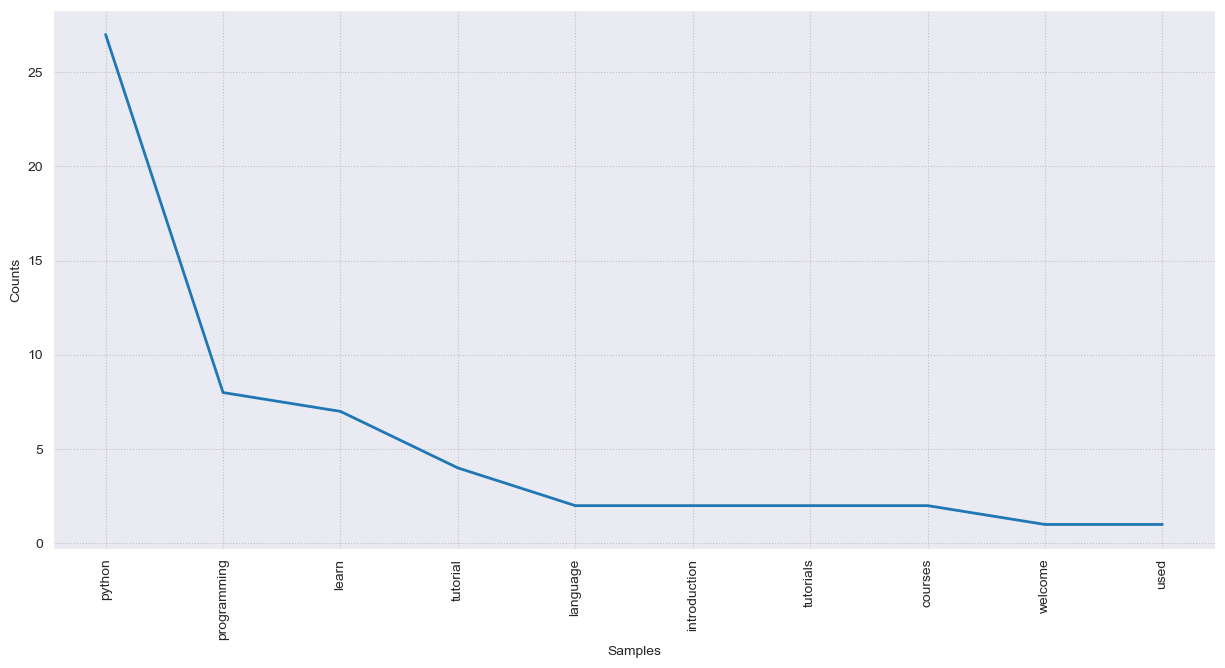

In [3]:
"""
    - Step 1: Use the above google search results 
    - Step 2: Preprocess the above results that have been stored in a csv file
    - Step 3: Get rid of Stopwords & Hyperlinks in the results
     
"""

# Load the search results from the CSV file:
def load_search_results(filename):
    results = []
    with open(filename, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            title, link = row
            results.append(title)
    return results

# Perform Natural Language Processing tasks:
def perform_nlp(search_results):
    # Combine search results into a single text
    text = ' '.join(search_results)

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords (common words like 'the', 'and', 'is')
    stopwords_set = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stopwords_set]

    # Get the frequency distribution of words
    freq_dist = FreqDist(filtered_words)

    # Plot the top 10 most common words
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    plt.figure(figsize=(15, 7))
    freq_dist.plot(10, cumulative=False)
    plt.show()

    # Perform other NLP tasks as needed, such as sentiment analysis, named entity recognition, etc.
    
# Using the goodle seach results:
filename = "Python_google_search_results.csv"
search_results = load_search_results(filename)
perform_nlp(search_results)

In [4]:
# Claning my word count such that is no stopwords, punctuations and for them to be in lowercase to allow for a more correct word count: 
corpus = []

# Remove punctuation, convert to lowercase, and remove stopwords from each text
for text in search_results:
    
    # Remove punctuation and convert to lowercase
    
    text = ''.join(char for char in text if char not in string.punctuation).lower()
    
    # Remove stopwords
    
    text_no_stopwords = ' '.join(word for word in text.split() if word not in set(stopwords.words('english')))
    corpus.append(text_no_stopwords)

#print(corpus)

# Getting a word count:  
word_counts = Counter(" ".join(corpus).split())

In [5]:
corpus

['welcome pythonorg',
 'python programming language',
 'introduction python',
 'python used beginners guide',
 'learn python programming',
 'learn python programming',
 'learn python stepbystep 2022',
 'googles python class python education',
 'real python python tutorials',
 'py4e python everybody',
 'python tutorial',
 'cs50s introduction programming python',
 'pcap programming essentials python',
 'python courses training tutorials',
 'learn python free interactive python tutorial',
 'learn python programming online courses programs',
 'python freecodecamporg',
 'pypi · python package index',
 'pycharm python ide professional developers',
 'python tutorial learn python programming',
 'learn python programming python tutorial',
 'python® – language today tomorrow',
 'python visual studio code',
 'python']

In [6]:
def label_decoder(text):
    # Setting the entire data to be lowercase to avoid not labelling correctly because the word is not according to the specified search word
    text = text.lower()
    if "programming" in text or "learn" in text or "code" in text or "tutorial" in text or "language" in text or "developer" in text or "education" in text or "package" in text:
        return 'Positive' # Educational purposes
    else: 
        return 'Negative' # non eductional purposes
    
labels = [(text, label_decoder(text)) for text in corpus]

# Display the labeled data
for text, label in labels:
    print(f"Label: {label}, Text: {text}")

Label: Negative, Text: welcome pythonorg
Label: Positive, Text: python programming language
Label: Negative, Text: introduction python
Label: Negative, Text: python used beginners guide
Label: Positive, Text: learn python programming
Label: Positive, Text: learn python programming
Label: Positive, Text: learn python stepbystep 2022
Label: Positive, Text: googles python class python education
Label: Positive, Text: real python python tutorials
Label: Negative, Text: py4e python everybody
Label: Positive, Text: python tutorial
Label: Positive, Text: cs50s introduction programming python
Label: Positive, Text: pcap programming essentials python
Label: Positive, Text: python courses training tutorials
Label: Positive, Text: learn python free interactive python tutorial
Label: Positive, Text: learn python programming online courses programs
Label: Positive, Text: python freecodecamporg
Label: Positive, Text: pypi · python package index
Label: Positive, Text: pycharm python ide professional 

In [7]:
corpus_df = pd.DataFrame(labels, columns=['Text', 'Sentiment'])

In [8]:
corpus_df

,Text,Sentiment
0,welcome pythonorg,Negative
1,python programming language,Positive
2,introduction python,Negative
3,python used beginners guide,Negative
4,learn python programming,Positive
5,learn python programming,Positive
6,learn python stepbystep 2022,Positive
7,googles python class python education,Positive
8,real python python tutorials,Positive
9,py4e python everybody,Negative


In [9]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 46


In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from collections import Counter

# Assuming 'corpus' is a list of your text data:

word_counts = Counter(" ".join(corpus).split())
#vocab_size = len(word_counts)
embedding_dim = 50
# Assuming 'corpus' is a list of your text data
max_length = max(len(sequence.split()) for sequence in corpus)

In [12]:
word_counts = Counter(" ".join(corpus).split())

df = pd.DataFrame({'Text': word_index})
df['Sentiment'] = 'postive'
df['Index'] = df.index

In [13]:
df

,Text,Sentiment,Index
2022,15,postive,2022
beginners,12,postive,beginners
class,17,postive,class
code,45,postive,code
courses,8,postive,courses
cs50s,22,postive,cs50s
developers,38,postive,developers
education,18,postive,education
essentials,24,postive,essentials
everybody,21,postive,everybody


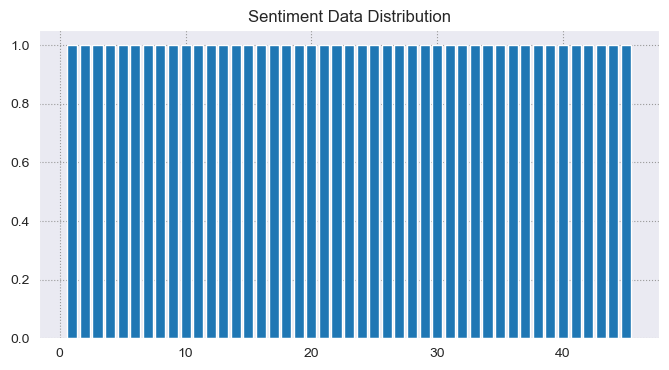

In [14]:
# There's no need to do the sentiment analysis to rate whether or not the search results was for a python animal or something related to python programming:

val_count = df.Text.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")
plt.show();

In [23]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

cnt_srs = df.Text.value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Google Python Searches distribution',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Ratings")

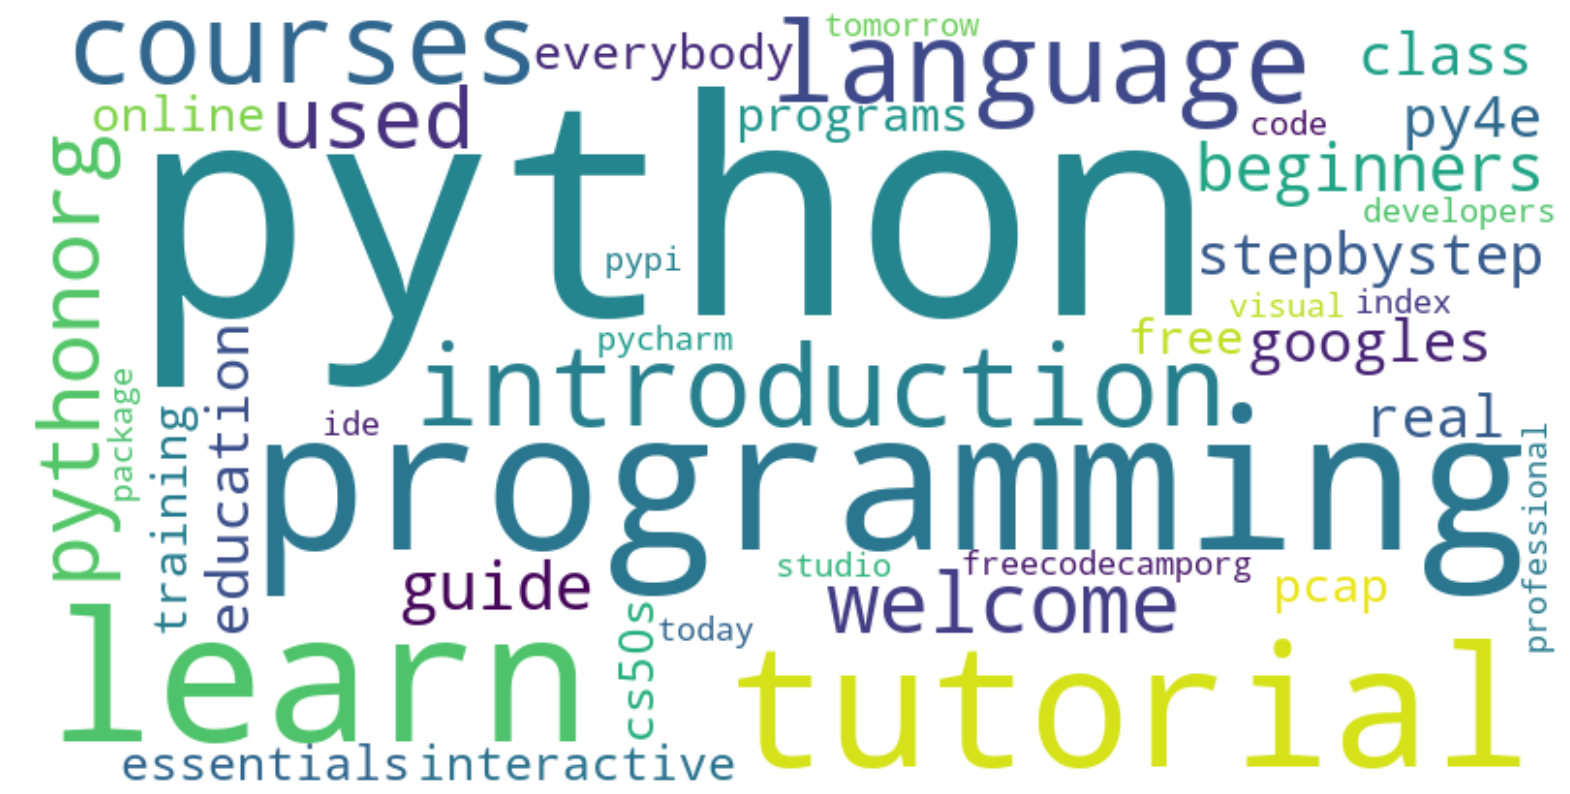

In [27]:
from wordcloud import WordCloud
import seaborn as sns


# Combine the text data into a single string
text = " ".join(corpus)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(df)

In [45]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from collections import Counter
from keras.preprocessing.sequence import pad_sequences

# Assuming 'corpus' is a list of your text data:

word_counts = Counter(" ".join(corpus).split())
#vocab_size = len(word_counts)
embedding_dim = 50
# Assuming 'corpus' is a list of your text data
max_length = max(len(sequence.split()) for sequence in corpus)

In [46]:
#split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(corpus_df['Text'], corpus_df['Sentiment'], test_size=0.2, random_state=42)

In [50]:
MAX_NB_WORDS = 20000

# get the raw text data
texts_train = X_train.astype(str)
texts_test = X_test.astype(str)


sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

In [52]:
MAX_SEQUENCE_LENGTH = 200
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
X_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_train.shape)
print('Shape of data test tensor:', X_test.shape)

Shape of data tensor: (19, 200)
Shape of data test tensor: (5, 200)


In [53]:
model = Sequential()
model.add(Embedding(46, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [56]:
np.array(X_train)

model.fit(np.array(X_train), y_train,
          batch_size=128,
          epochs=10,
          validation_data=(X_test, y_test))

Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node 'binary_crossentropy/Cast' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\Temp\ipykernel_50340\2048379804.py", line 1, in <module>
      model.fit(X_train, y_train,
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\keras\src\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\keras\src\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Gomolemo.Kototsi\AppData\Local\anaconda3\Lib\site-packages\keras\src\losses.py", line 2421, in binary_crossentropy
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'binary_crossentropy/Cast'
Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_8711]